In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import os

📊 Visualizing results for: yolov8n


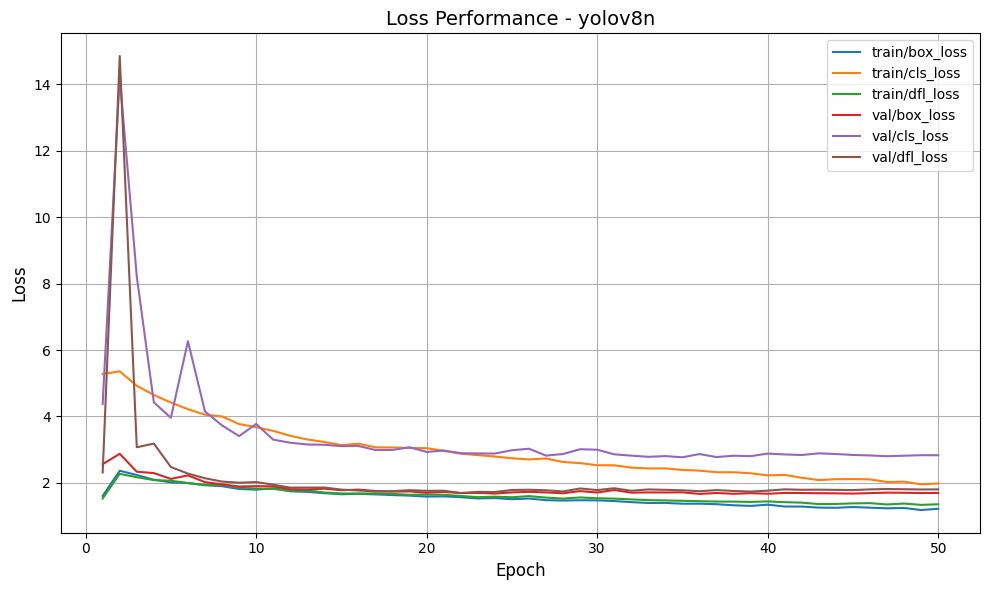

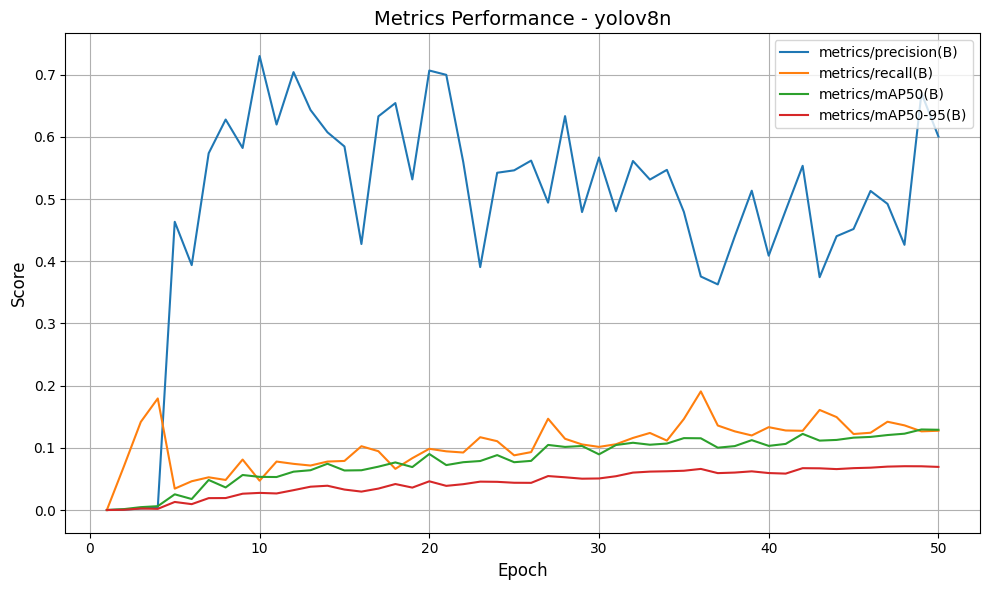

📊 Visualizing results for: yolov8n10


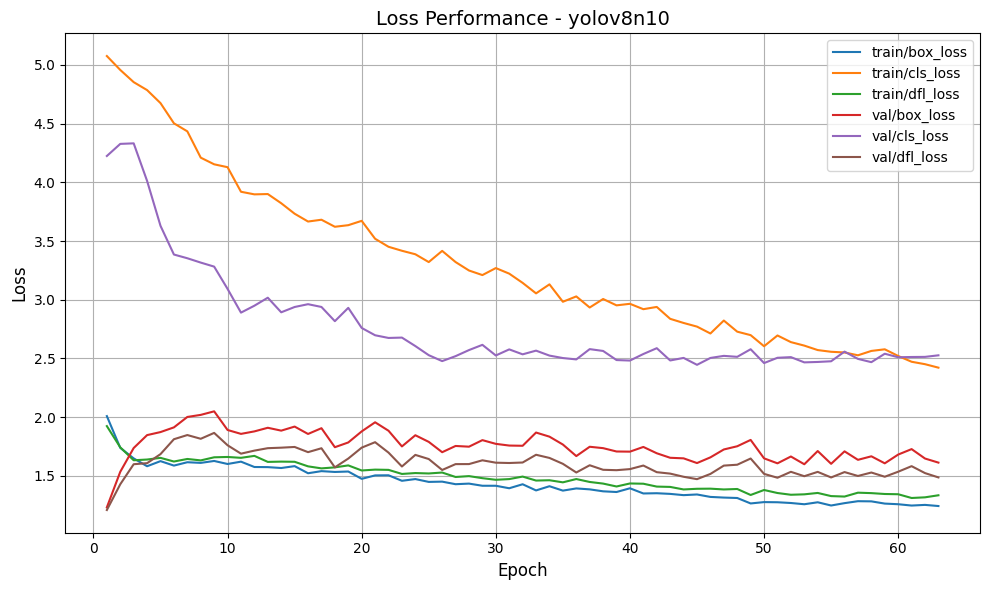

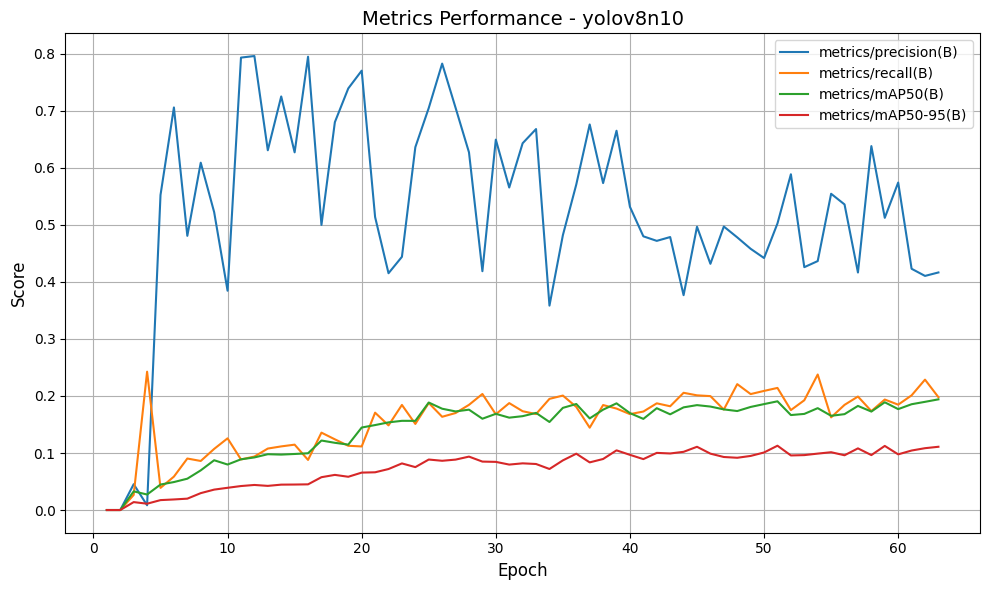

📊 Visualizing results for: yolov8n11


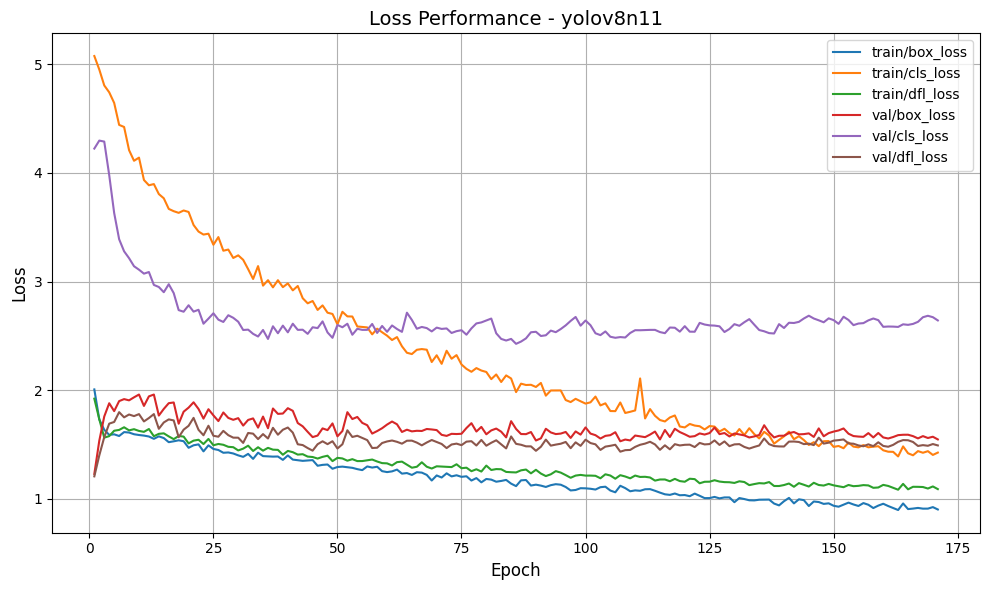

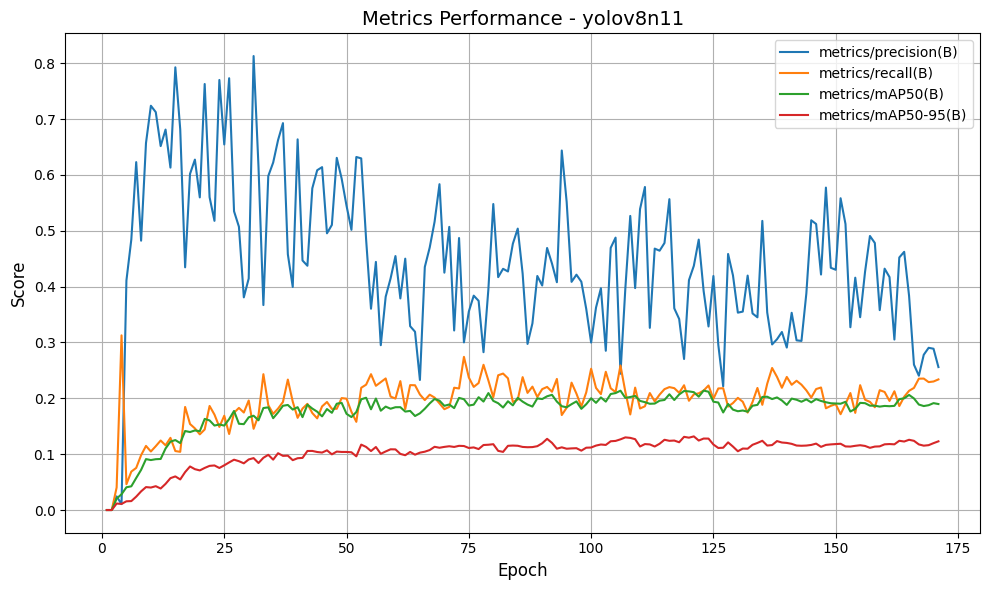

📊 Visualizing results for: yolov8n2


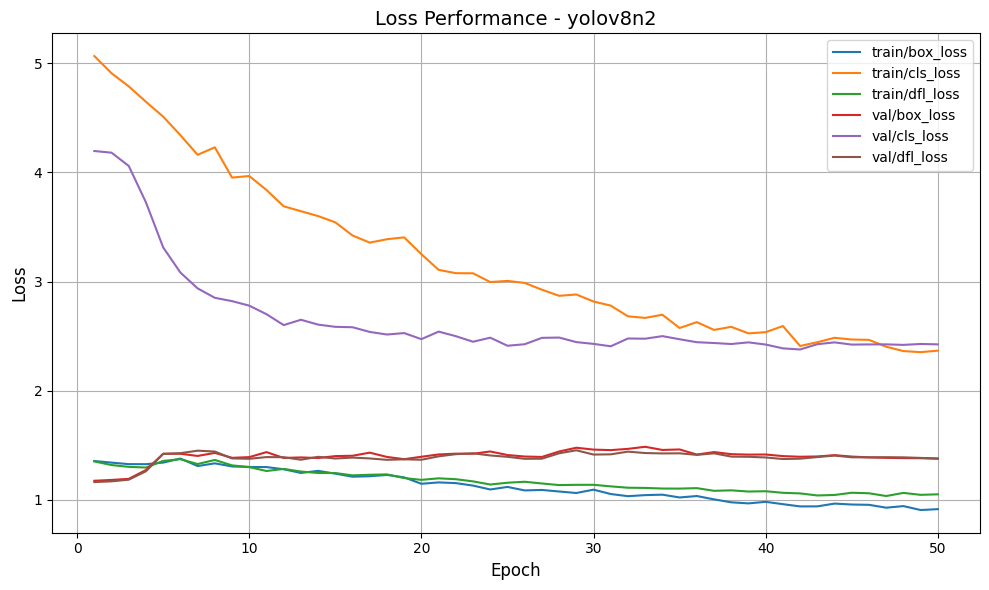

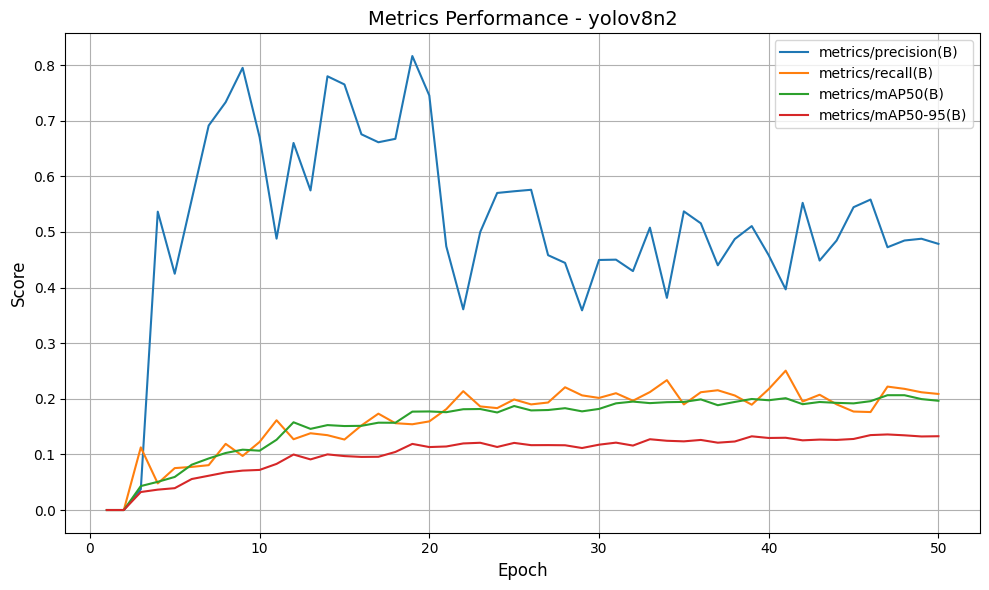

📊 Visualizing results for: yolov8n3


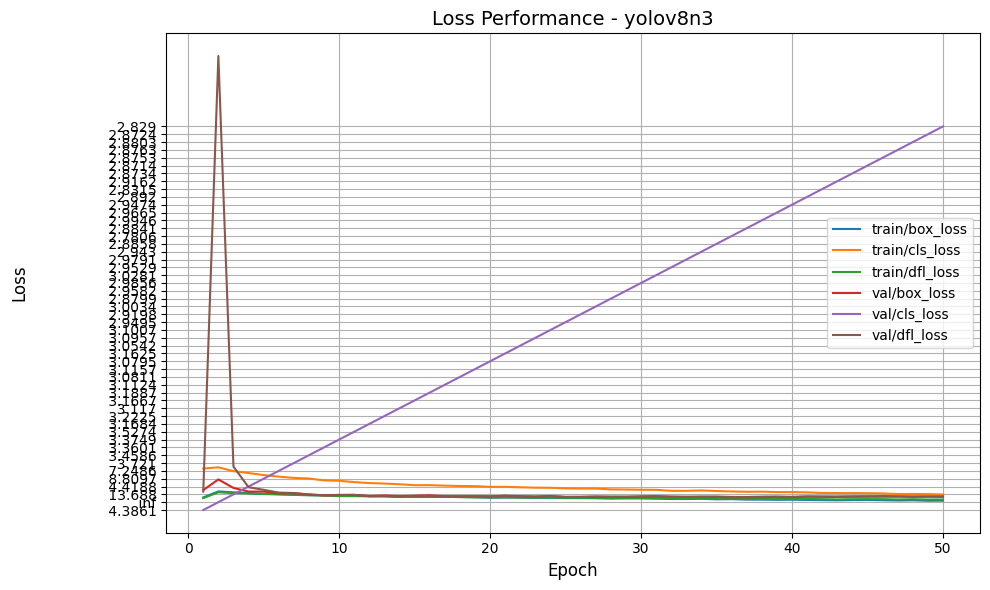

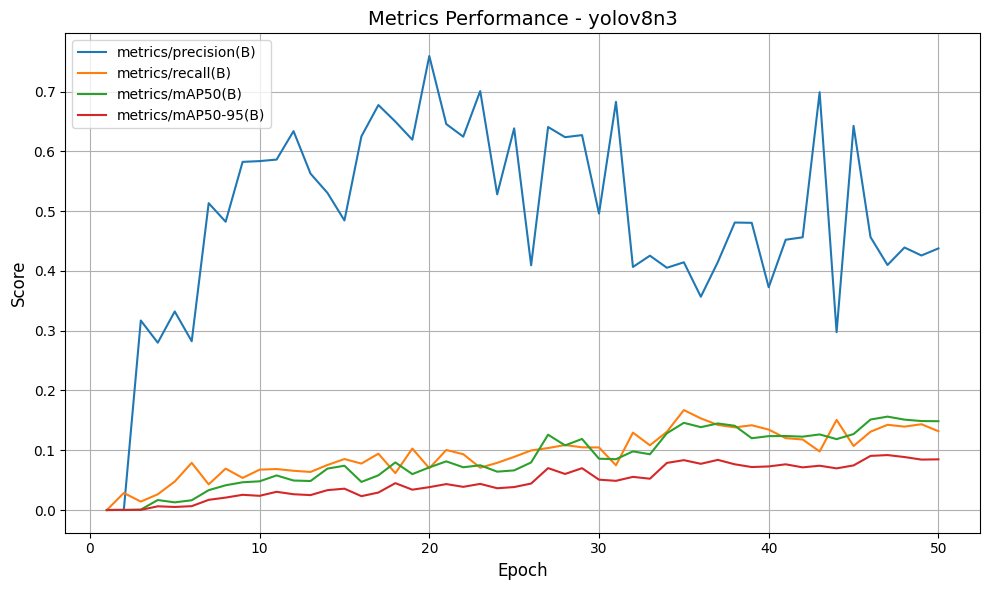

📊 Visualizing results for: yolov8n4


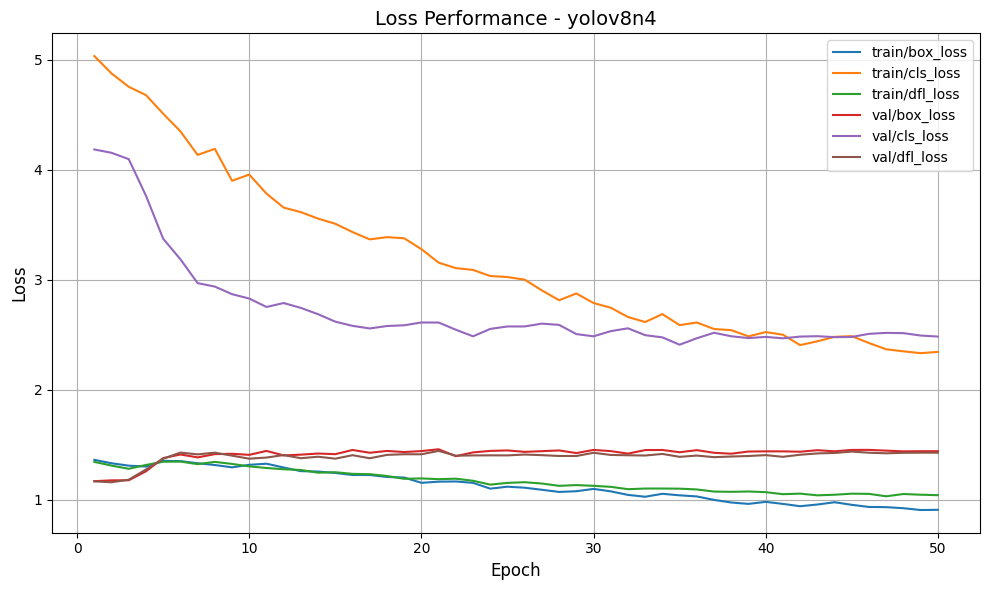

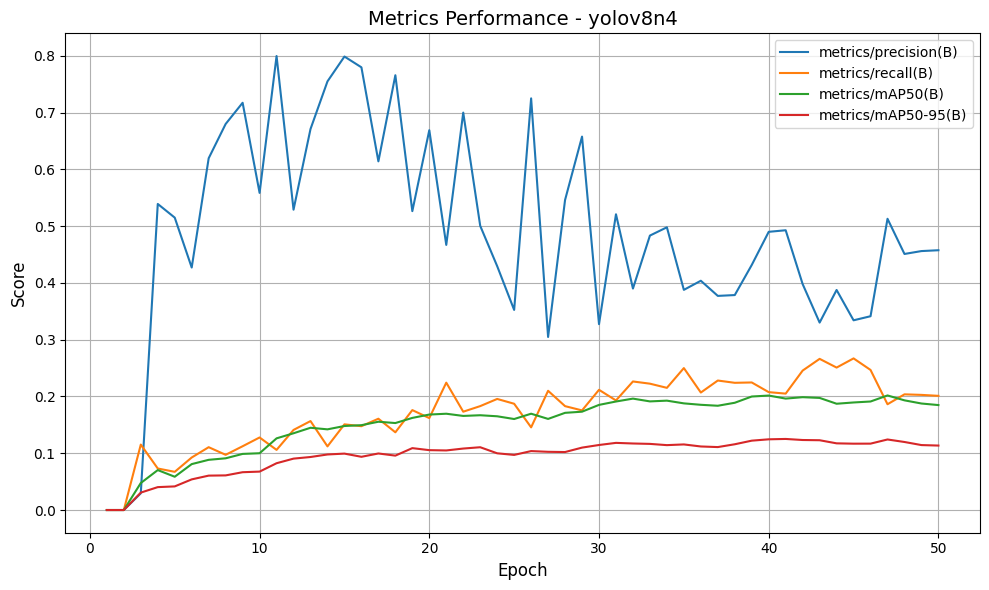

📊 Visualizing results for: yolov8n5


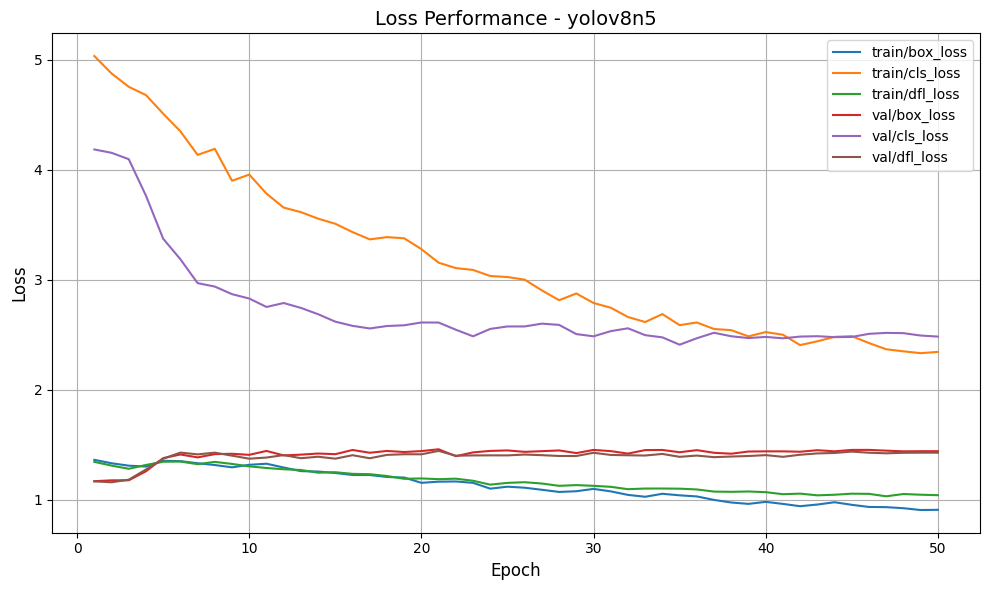

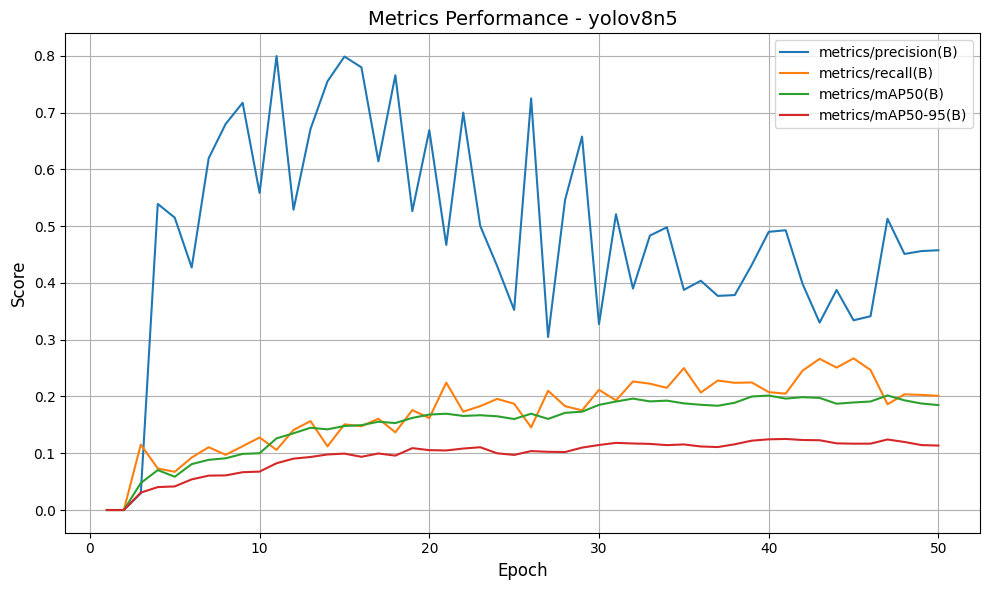

📊 Visualizing results for: yolov8n6


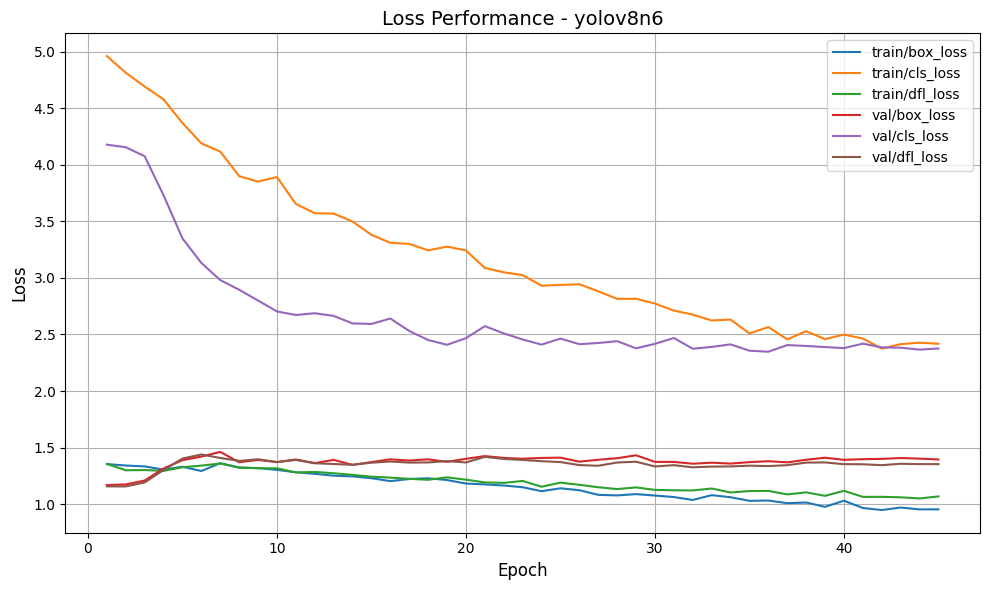

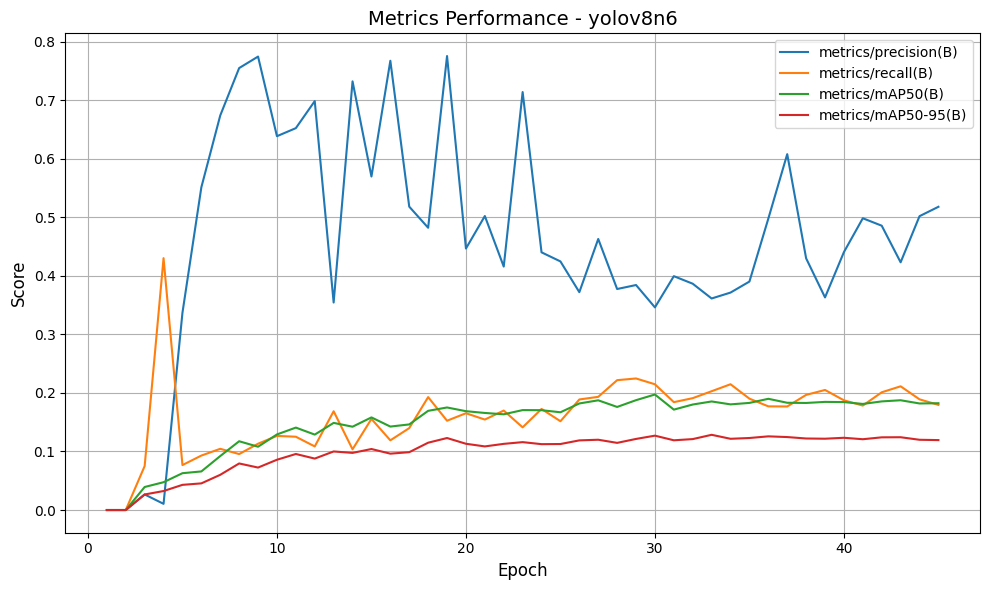

📊 Visualizing results for: yolov8n7


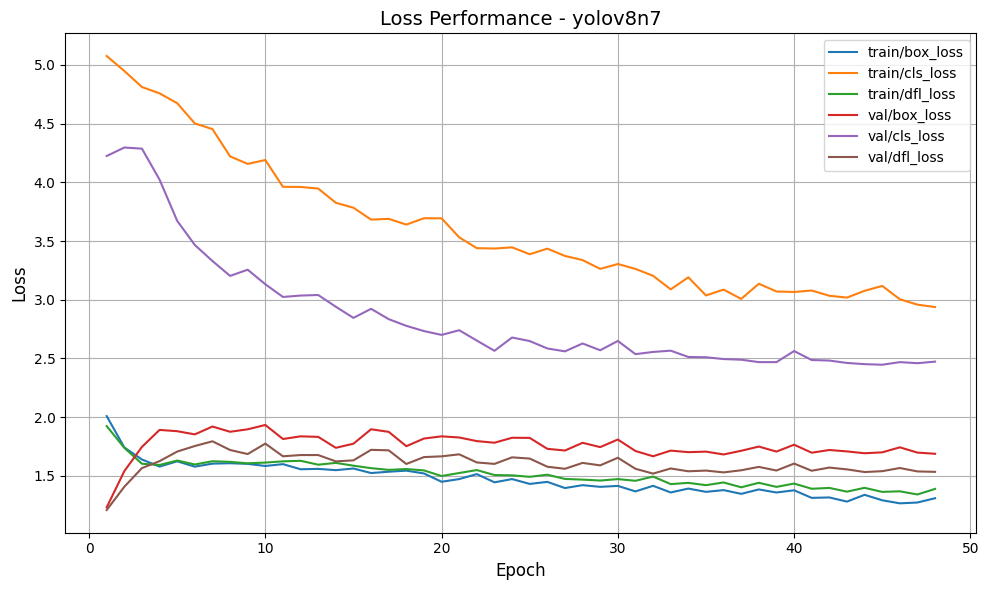

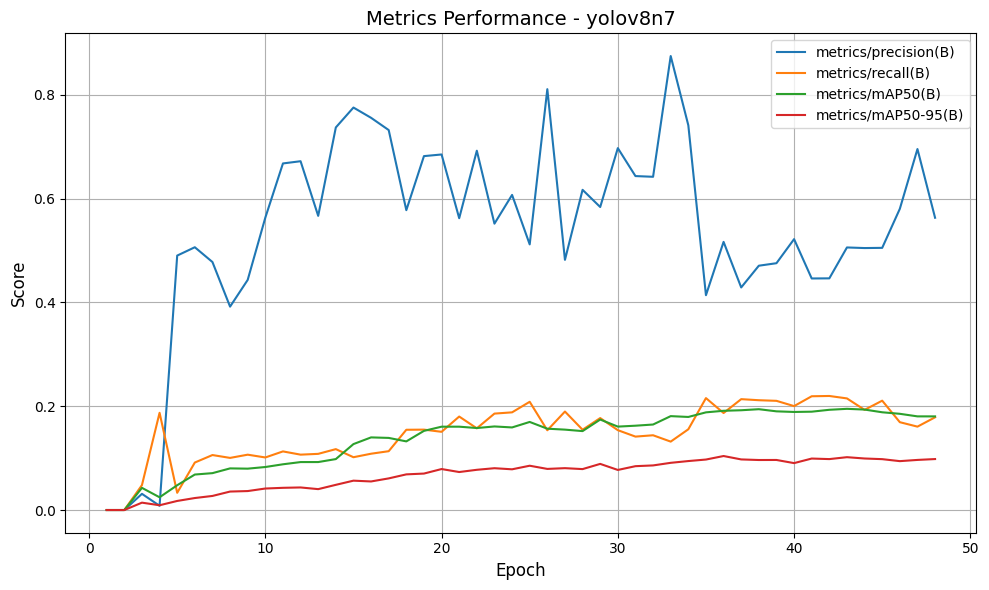

📊 Visualizing results for: yolov8n8


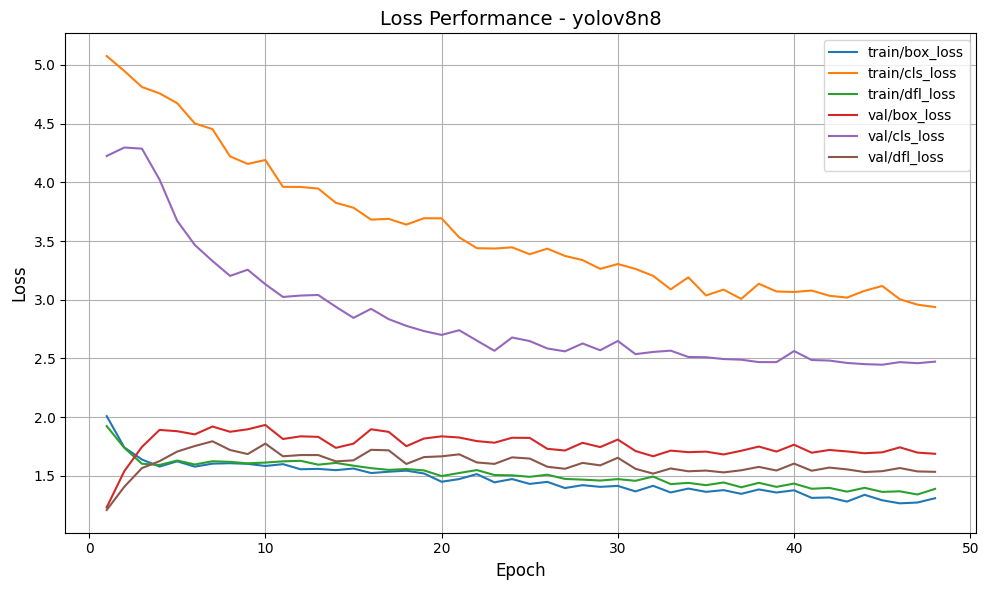

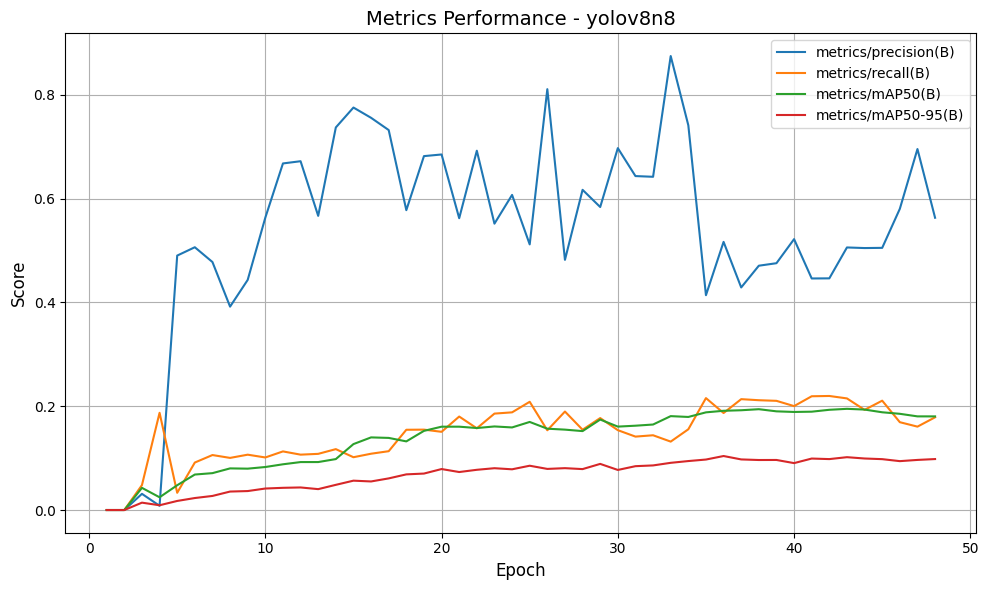

📊 Visualizing results for: yolov8n9


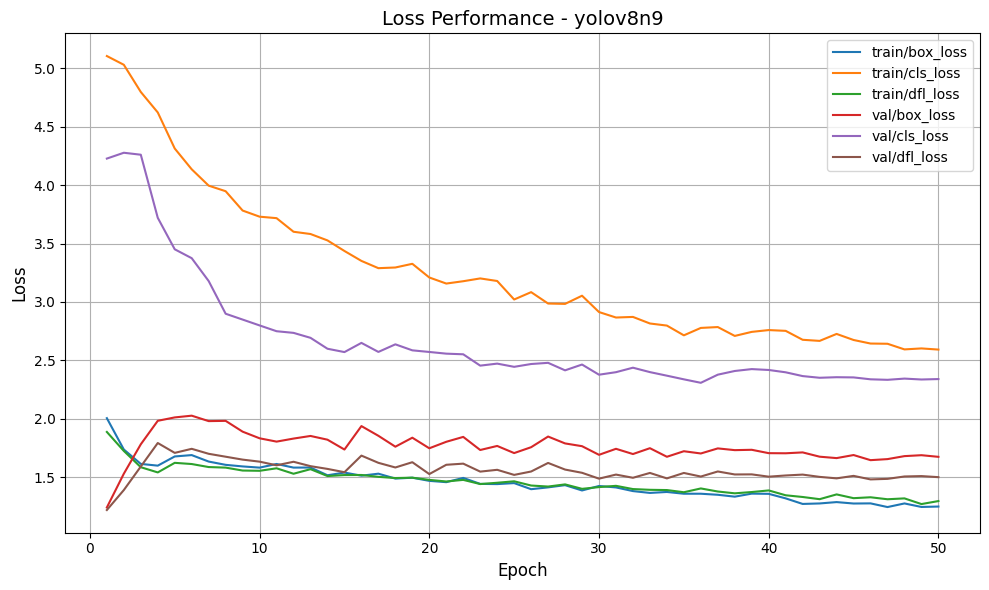

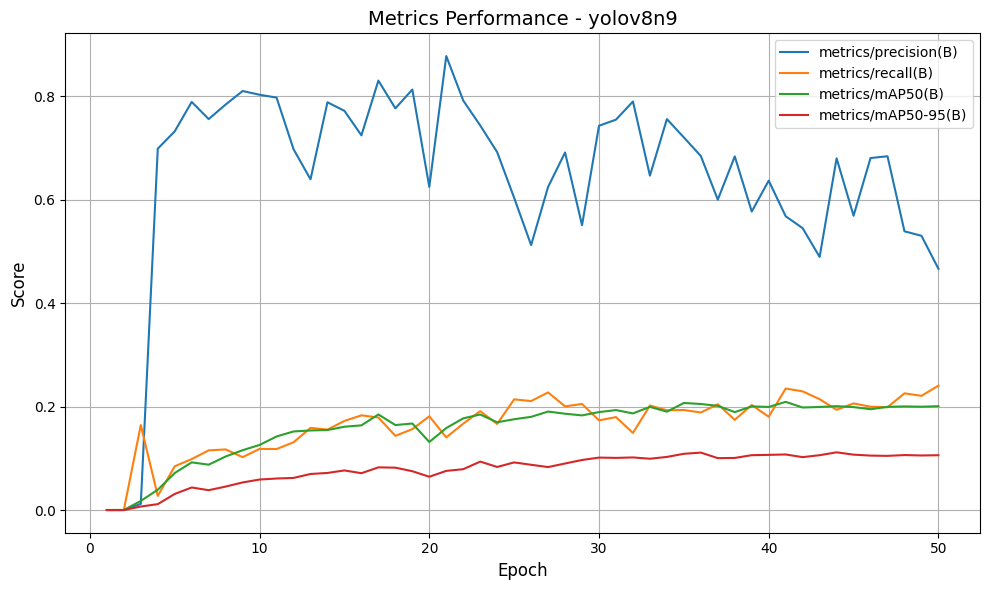

In [54]:
def visualize_yolo_results(model_family='yolo', model_name='yolov10n'):
    base_path = os.path.join(os.path.abspath(os.getcwd()), 'runs_models')
    model_dir = os.path.join(base_path, model_family, model_name)

    # find all subfolders (each representing one experiment run)
    if not os.path.exists(model_dir):
        print(f"❌ Path not found: {model_dir}")
        return

    model_list = [m for m in os.listdir(model_dir) if os.path.isdir(os.path.join(model_dir, m))]
    if not model_list:
        print(f"⚠️ No subfolders found in {model_dir}")
        return

    for model in model_list:
        path = os.path.join(model_dir, model, 'results.csv')
        if not os.path.exists(path):
            print(f"⚠️ Skipping: no results.csv in {model}")
            continue

        print(f"📊 Visualizing results for: {model}")
        df = pd.read_csv(path)
        df.columns = df.columns.str.strip()

        # === 1. Plot training & validation losses ===
        plt.figure(figsize=(10,6))
        for col in df.columns:
            if "train/" in col or "val/" in col:
                plt.plot(df["epoch"], df[col], label=col)
        plt.xlabel("Epoch", fontsize=12)
        plt.ylabel("Loss", fontsize=12)
        plt.title(f"Loss Performance - {model}", fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # === 2. Plot metrics (precision, recall, mAP) ===
        metric_cols = [c for c in df.columns if "metrics" in c]
        if metric_cols:
            plt.figure(figsize=(10,6))
            for col in metric_cols:
                plt.plot(df["epoch"], df[col], label=col)
            plt.xlabel("Epoch", fontsize=12)
            plt.ylabel("Score", fontsize=12)
            plt.title(f"Metrics Performance - {model}", fontsize=14)
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.show()
        else:
            print(f"ℹ️ No metric columns found in {model}")

# === Run visualization ===
visualize_yolo_results(model_family='yolo', model_name='yolov8n')


📊 Visualizing results for: yolov10n


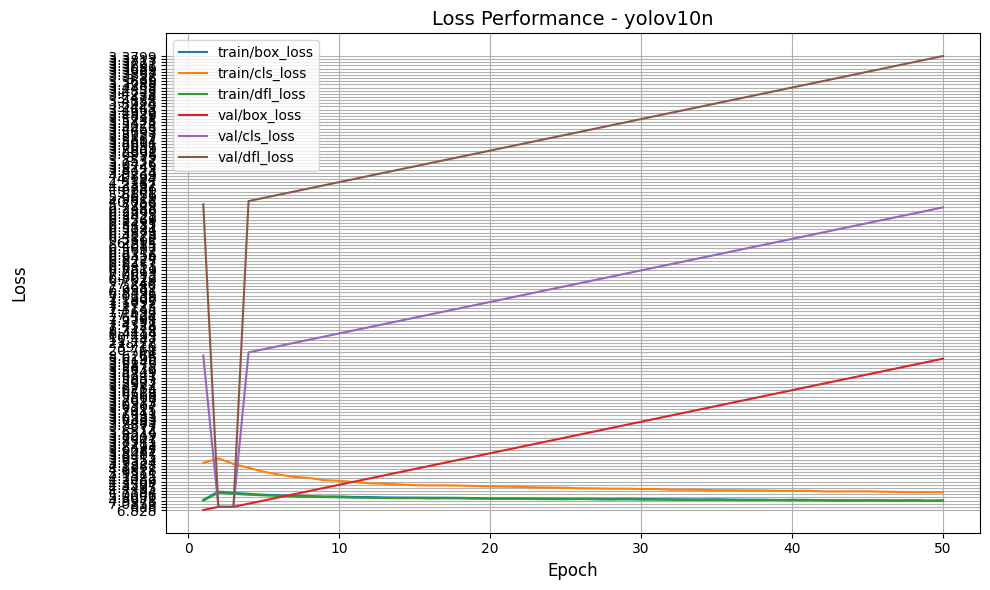

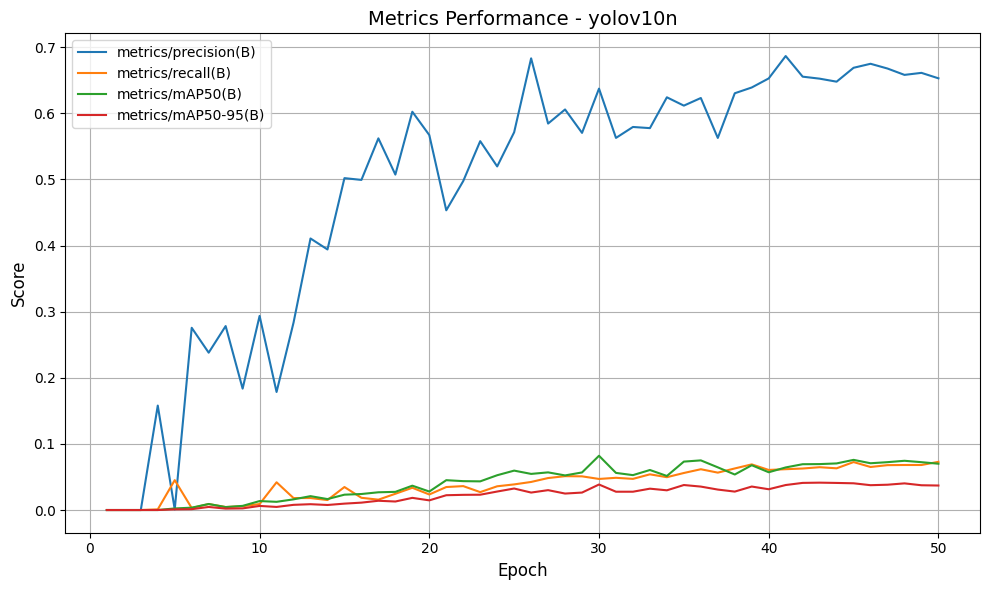

📊 Visualizing results for: yolov10n10


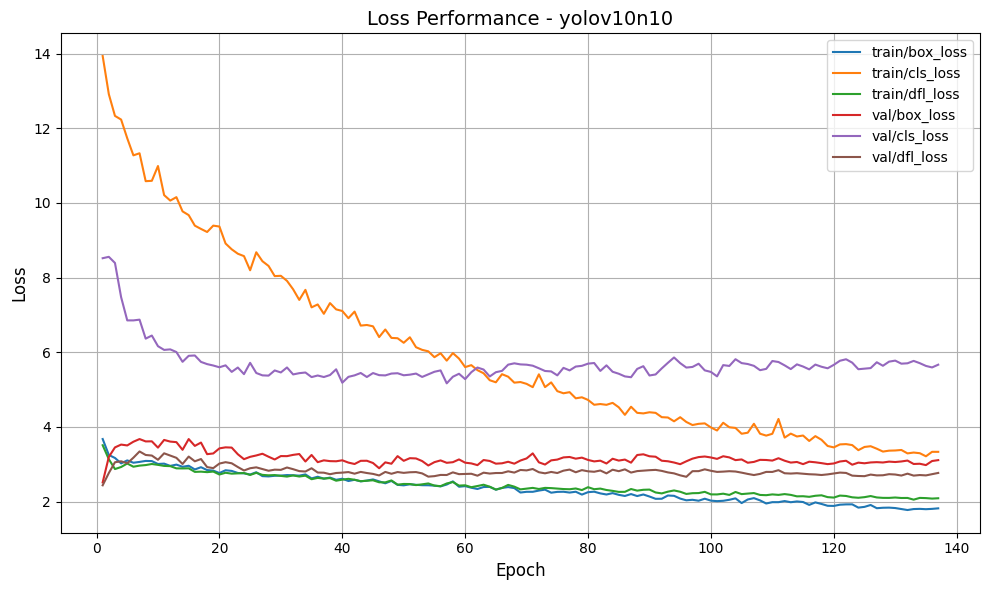

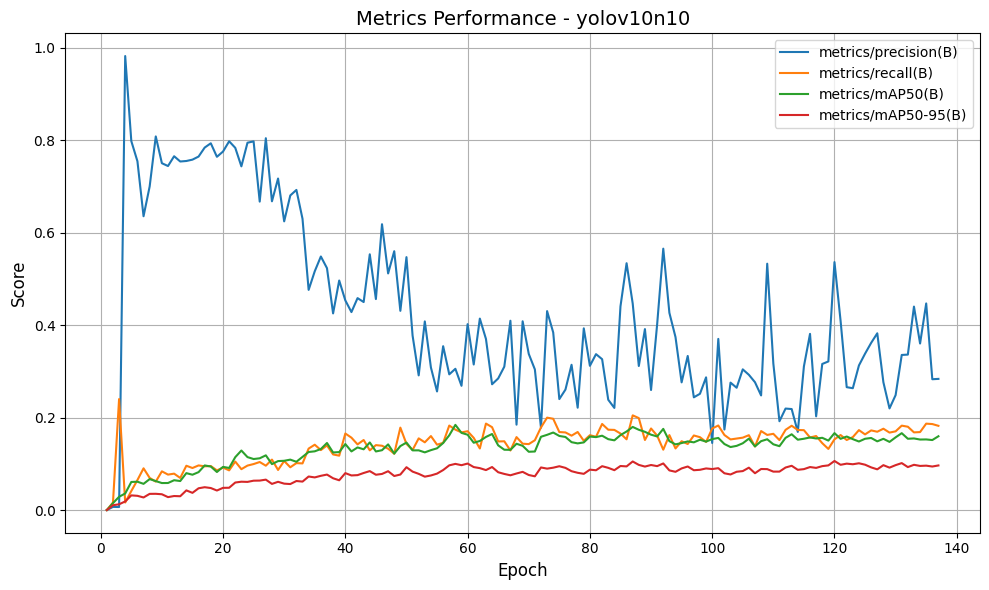

📊 Visualizing results for: yolov10n2


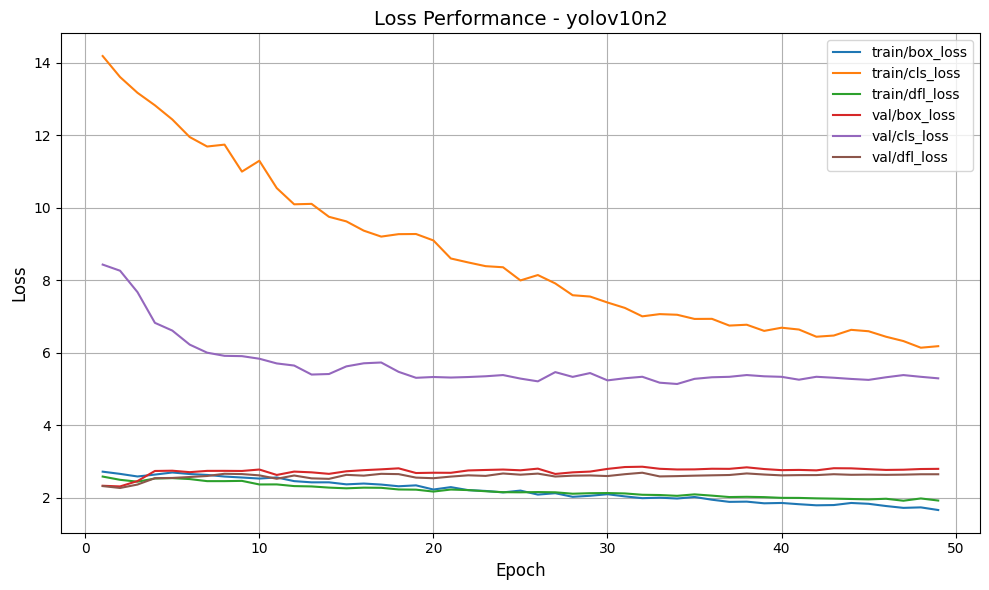

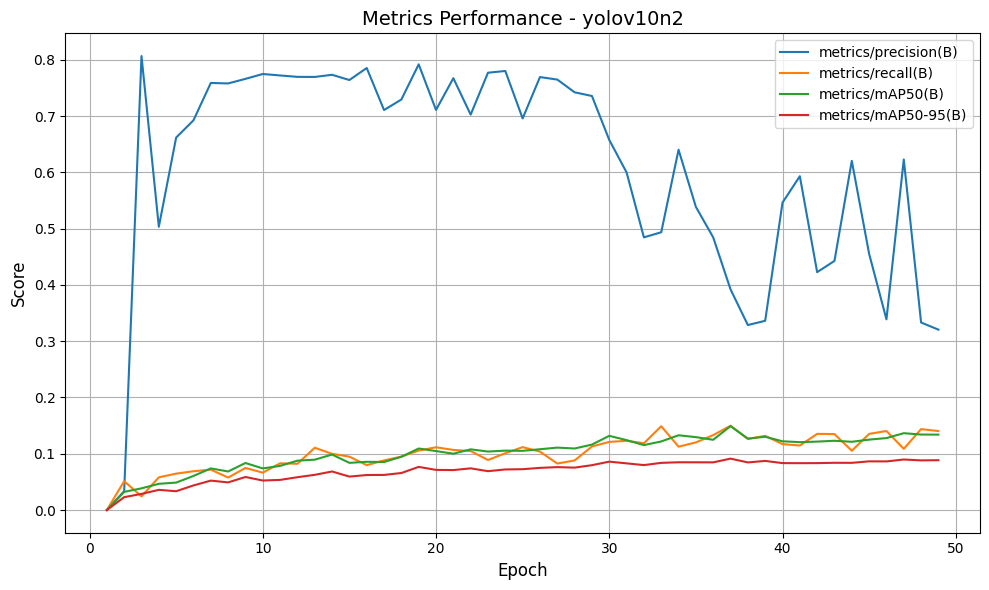

📊 Visualizing results for: yolov10n3


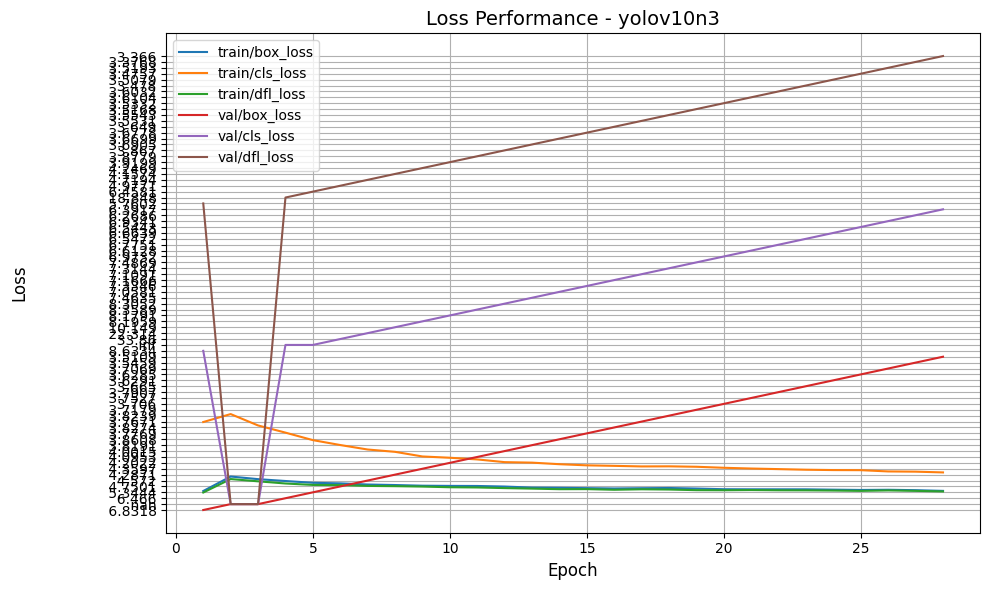

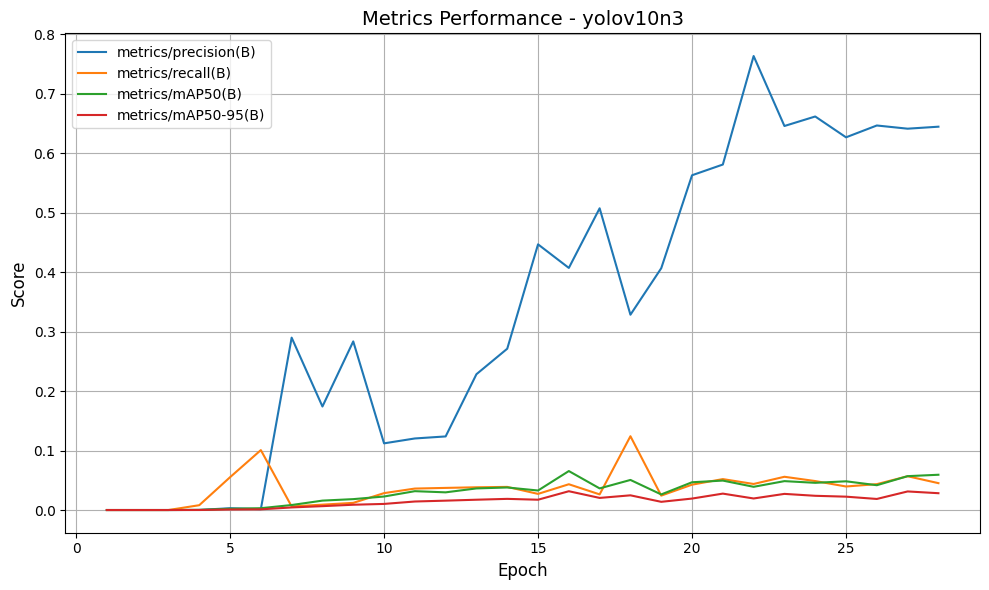

📊 Visualizing results for: yolov10n4


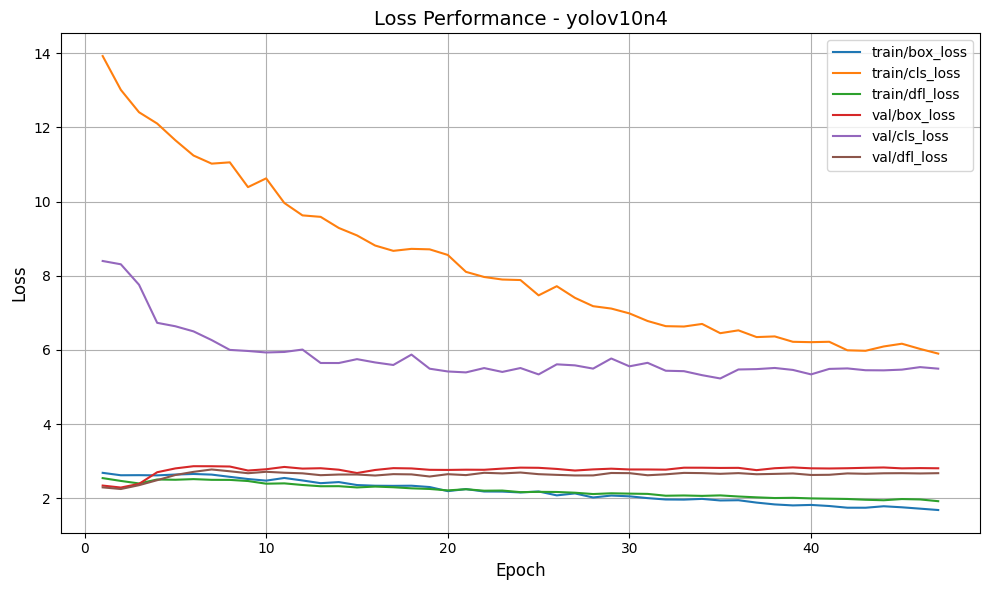

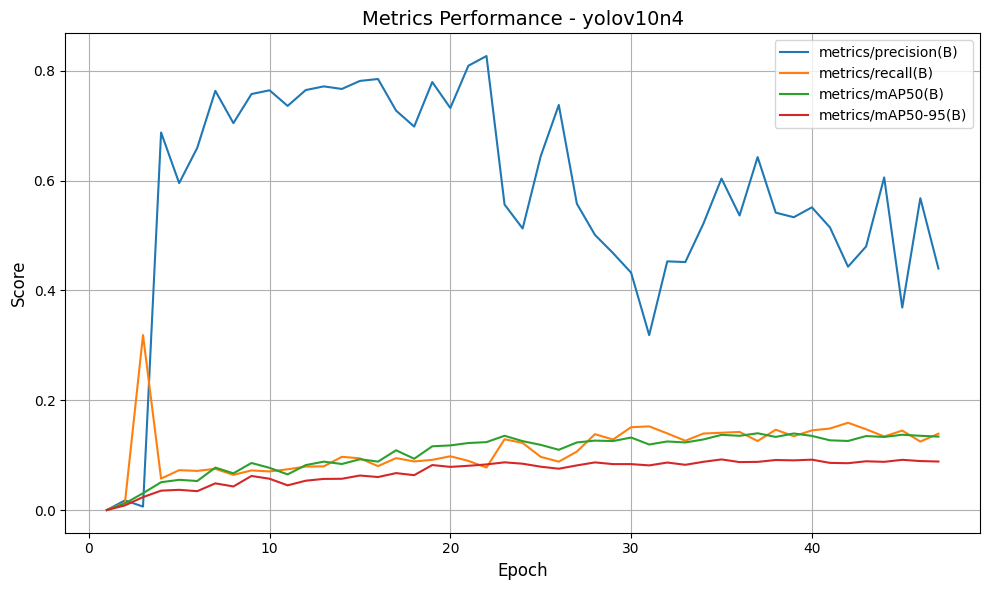

📊 Visualizing results for: yolov10n5


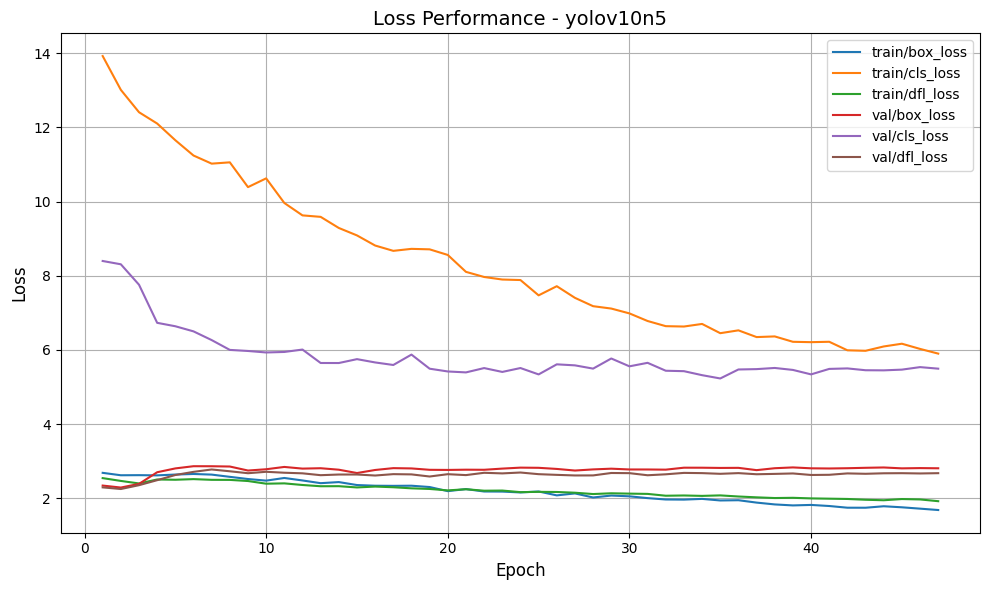

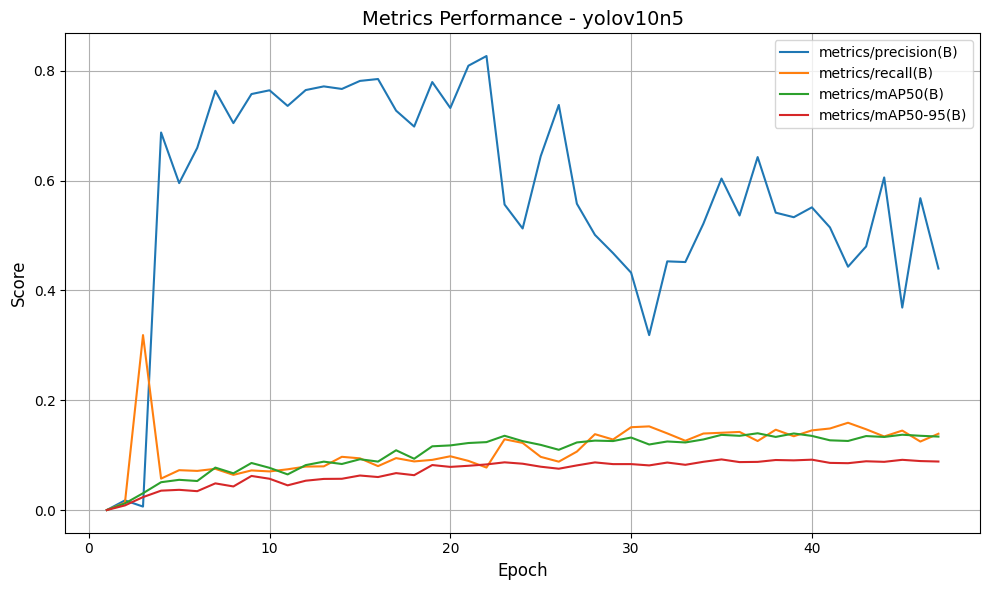

📊 Visualizing results for: yolov10n6


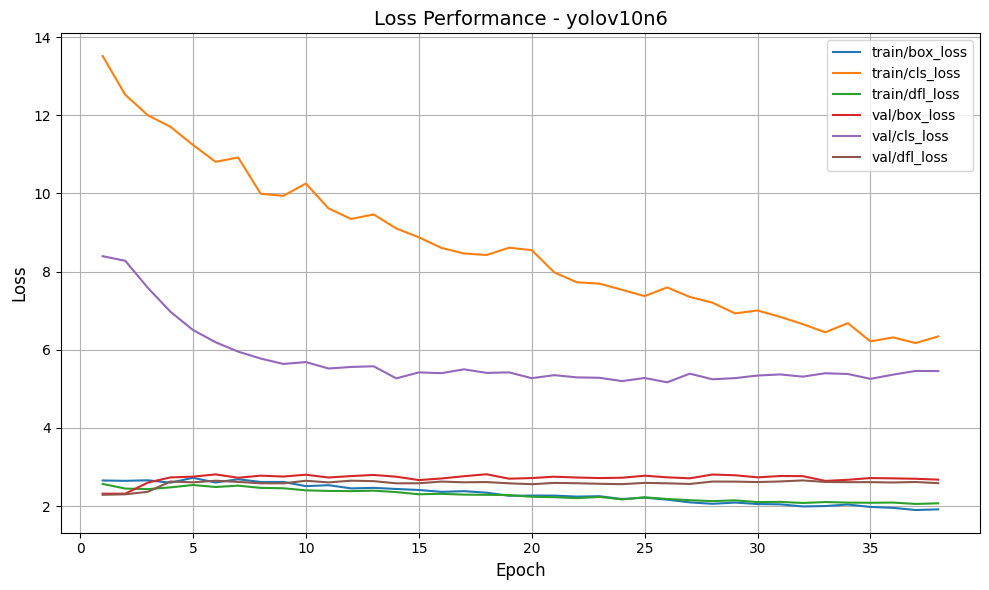

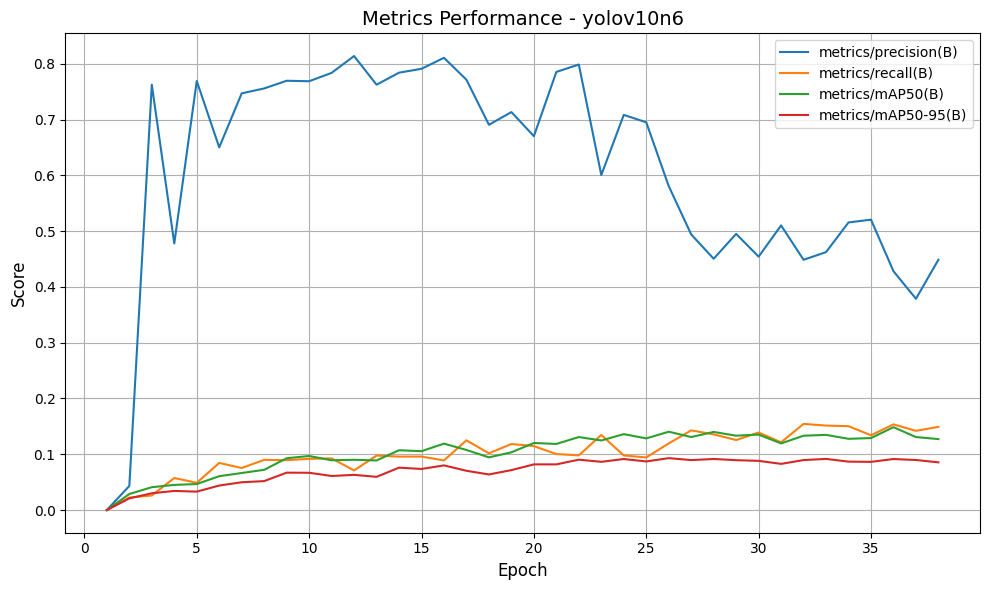

📊 Visualizing results for: yolov10n7


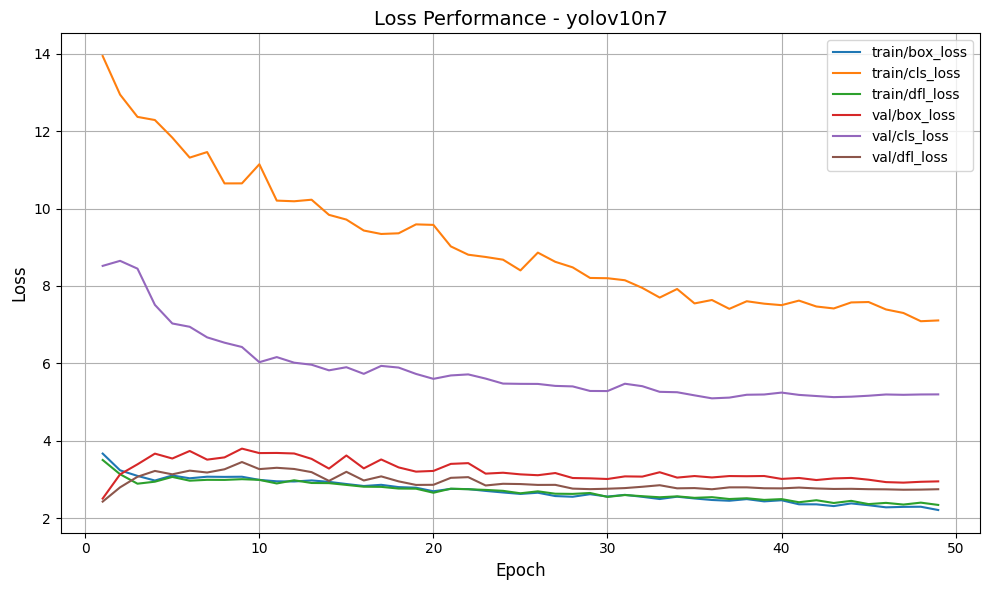

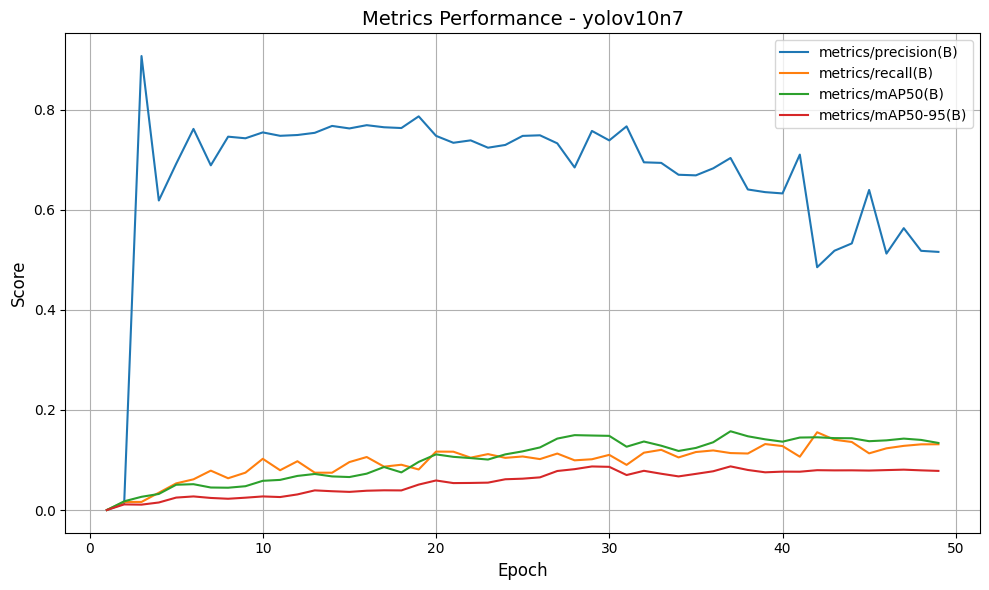

📊 Visualizing results for: yolov10n8


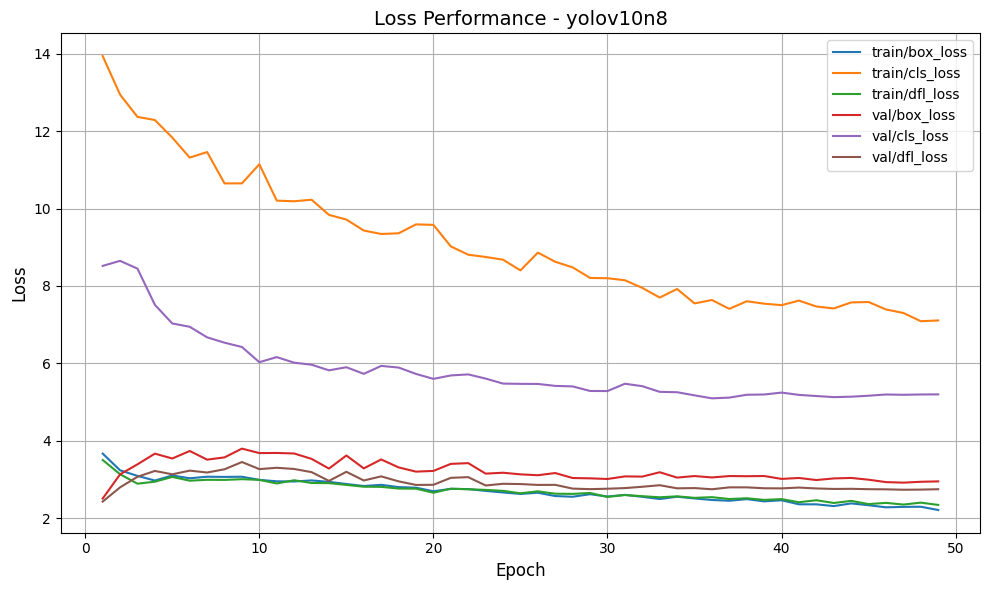

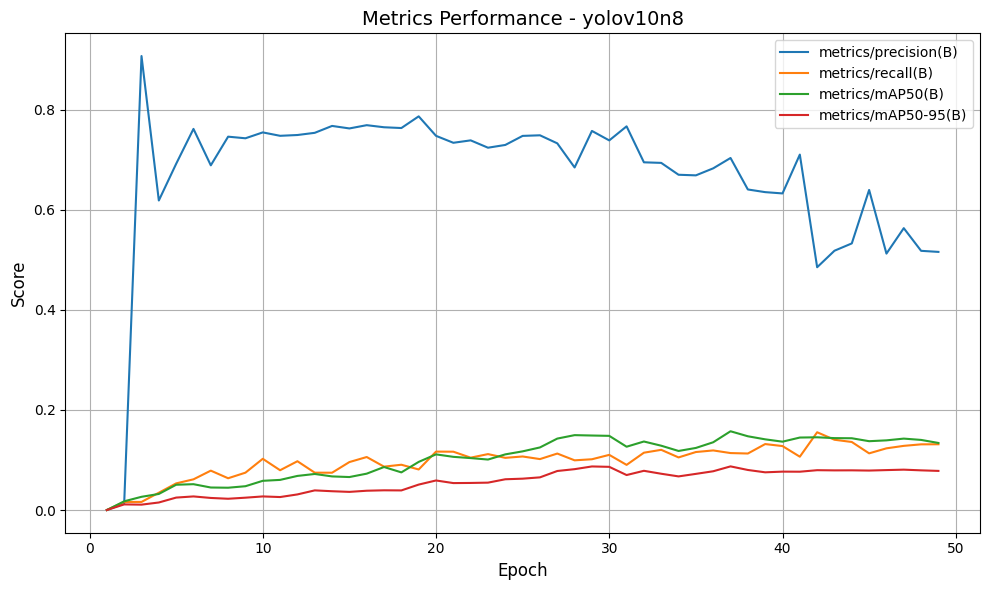

📊 Visualizing results for: yolov10n9


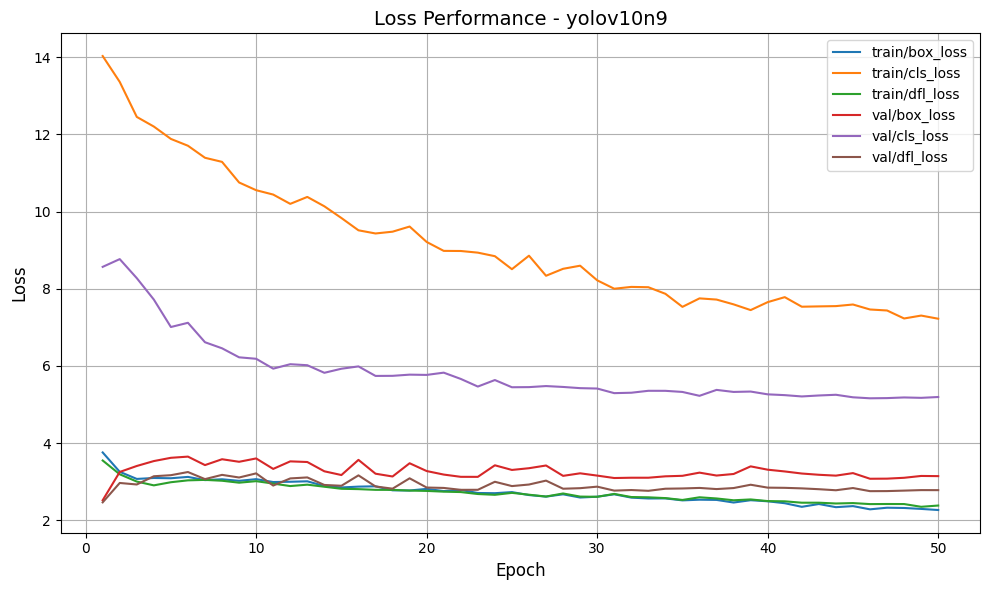

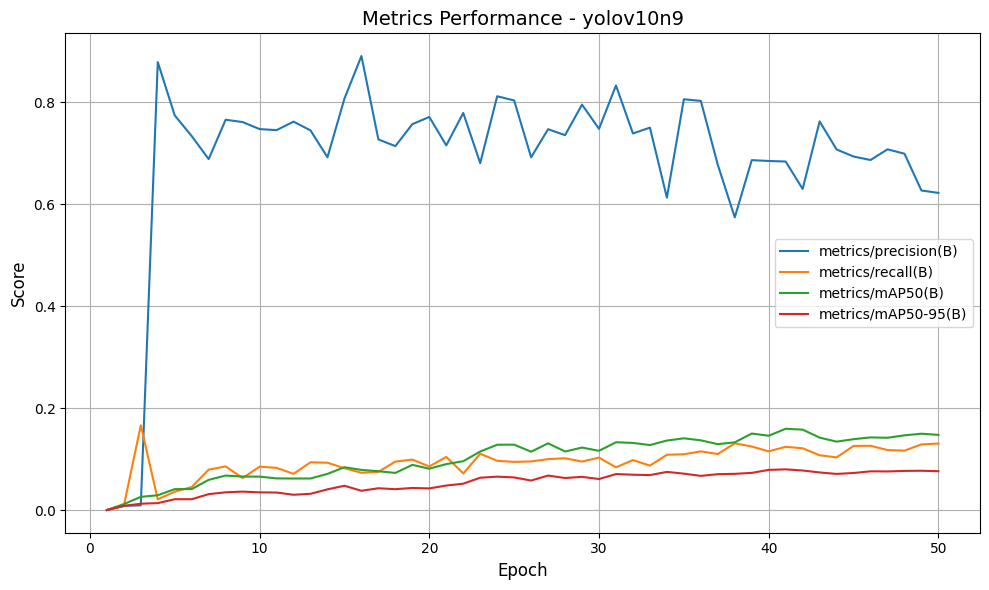

In [55]:
visualize_yolo_results(model_family='yolo', model_name='yolov10n')